In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

import IPython
import matplotlib as mpl
import seaborn as sns

%matplotlib notebook
%matplotlib inline

from IPython import display
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

## sdwqe

- basic system conditions
- system dynamics
- run system through dynamics on t time

## Basic system conditions

- N: The number of objects
- r: The mean radius of objects
- r_std: the standard deviation of the radius of objects
- plr: The polarity of each object, given as 2 components x+iy is the idea
- x:
- y:
- z:
- vx:
- vy:
- vz:

In [2]:
#basic constants
N = 50
r = 10
#r_std = 0.125
plr = np.random.normal(10, 2, N)
objects = []
#c = [np.random.normal(0, 500, 1)[0], np.random.normal(0, 500, 1)[0], np.random.normal(0, 500, 1)[0]]

for i in range(N):    
    
    theta = np.random.normal(0, 100, 1)[0] % 3.1415926
    
    #position for each particle
    x = np.random.normal(0, 500, 1)[0]
    y = np.random.normal(0, 500, 1)[0]
    z = np.random.normal(0, 500, 1)[0]

    #velocities for particles
    vx = np.random.normal(0, 0.05, 1)[0]
    vy = np.random.normal(0, 0.05, 1)[0]
    vz = np.random.normal(0, 0.05, 1)[0]

    objects.append([plr[i], theta , r, x, y, z, vx, vy, vz])

In [3]:
def move(time):

    for _ in range(time):

        for i in range(len(objects)):

            for j in range(len(objects)):
                if i == j:
                        next
                elif i != j:

                    R = np.sqrt( (objects[i][3]-objects[j][3])**2 + (objects[i][4]-objects[j][4])**2 + (objects[i][5]-objects[j][5])**2 )

                    if R >= (objects[i][2] + objects[j][2]):
                        force = -(objects[i][0] + objects[j][0])/R
                        objects[i][6] = objects[i][6] + (objects[i][3]-objects[j][3])/R * force
                        objects[i][7] = objects[i][7] + (objects[i][4]-objects[j][4])/R * force
                        objects[i][8] = objects[i][8] + (objects[i][5]-objects[j][5])/R * force
                        
                        # append universe expansion unevenly based on lack of mass

                    elif R < (objects[i][2] + objects[j][2]):
                        objects[i][6] = 0
                        objects[i][7] = 0
                        objects[i][8] = 0
                        
                        # append merging particles
                        # calculate resulting speed

            objects[i][3] = objects[i][3] + objects[i][6]
            objects[i][4] = objects[i][4] + objects[i][7]
            objects[i][5] = objects[i][5] + objects[i][8]
    
    return(objects)

In [ ]:
def move(time):
    for _ in range(time):
        
        for i in range(len(list_center)):

            for j in range(len(list_center)):
                if i == j:
                    next
                elif i != j:
                    R = np.sqrt( (list_center[i][0]-list_center[j][0])**2 + (list_center[i][1]-list_center[j][1])**2 + (list_center[i][2]-list_center[j][2])**2 )
                    if R > (list_radius[i] + list_radius[j]):
                        sume = abs( list_center[i][3] ) + abs( list_center[i][4] ) + abs( list_center[j][3] ) + abs( list_center[j][4] )

                        rep = ((list_center[i][3]*list_center[j][3]) + (list_center[i][4]*list_center[j][4])) / np.sqrt(sume)

                        att = ((list_center[i][4]*list_center[j][3]) + (list_center[i][3]*list_center[j][4])) / np.sqrt(sume)

                        force = rep / np.sqrt(R) + att / np.sqrt(R)

                        v[i][0] = v[i][0] + (list_center[i][0]-list_center[j][0])/R * force
                        v[i][1] = v[i][1] + (list_center[i][1]-list_center[j][1])/R * force
                        v[i][2] = v[i][2] + (list_center[i][2]-list_center[j][2])/R * force
                                
                    elif R < (list_radius[i] + list_radius[j]):
                        
                        v[i][0] = v[i][0] + v[j][0]
                        v[i][1] = v[i][1] + v[j][1]
                        v[i][2] = v[i][2] + v[j][2]
                        list_center[i][3] = list_center[i][3] + list_center[j][3]
                        list_center[i][4] = list_center[i][4] + list_center[j][4]
                        list_radius[i] = list_radius[i] + list_radius[j] / 3
                        
                        v[j][0] = 0
                        v[j][1] = 0 
                        v[j][2] = 0 
                        list_center[j][3] = 0
                        list_center[j][4] = 0
                        list_radius[j] = 0

            list_center[i][0] = list_center[i][0] + v[i][0]
            list_center[i][1] = list_center[i][1] + v[i][1]
            list_center[i][2] = list_center[i][2] + v[i][2]
    return(list_center) 

In [4]:
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point
    
    #draw spheres
    for t in range(len(objects)):
        r = objects[t][2]
        c = [objects[t][3], objects[t][4], objects[t][5]]
        u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
        x = r*np.cos(u)*np.sin(v)
        y = r*np.sin(u)*np.sin(v)
        z = r*np.cos(v)
        ax.plot_surface(x-c[0], y-c[1], z-c[2], color = "white")
    
    expansion = 500 #+ num
    #x,y,z limits
    ax.set_xlim(-expansion, expansion) 
    ax.set_ylim(-expansion, expansion)
    ax.set_zlim(-expansion, expansion)
    move(1)

###########################################################################################################
# Plotting the Animation
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_box_aspect([1,1,1])   
ax.view_init(20, 45)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

###########################################################################################################
anim = FuncAnimation(fig, animate_func, interval=240, frames=600)

video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close() 

In [4]:


###########################################################################################################
rng = np.random.default_rng(156421)
nfr = 300 # Number of frames
time = 80 #time for the animation
fpss = nfr/(time/5) #frames per second, due to above

#expansion of space
space0 = 50 #initial size of space
A = 1.1 # velocity of space expanding
n = 3000 #number of scatterplot points in each galaxy

#galaxy 1
rng = np.random.default_rng(7)
c1 = [-25,0,-10] # center 1
v1 = [0,0,0] # velocity 1
x1 = np.random.normal(c1[0], 10, n)
y1 = np.random.normal(c1[1], 7.8, n)
z1 = np.random.normal(c1[2], 0.1, n) # - space0 + 1
r1 = np.sqrt((x1-c1[0])**2+(y1-c1[1])**2)
theta1 = rng.integers(low=0, high=360, size=n)
psy1 = rng.integers(low=0, high=360, size=1)*np.pi/360

#galaxy 2
rng = np.random.default_rng(3)
c2 = [30,20,-15] # center 2
v2 = [0,0,0] # velocity 2
x2 = np.random.normal(c2[0], 10, n)
y2 = np.random.normal(c2[1], 7.8, n)
z2 = np.random.normal(c2[2], 0.25, n) # - space0 + 1
r2 = np.sqrt((x2-c2[0])**2+(y2-c2[1])**2)
theta2 = rng.integers(low=0, high=360, size=n)
psy2 = rng.integers(low=0, high=360, size=1)*np.pi/360

#galaxy 3
rng = np.random.default_rng(2123)
c3 = [-20,-30,30] # center 3
v3 = [0,0,0] # velocity 3
x3 = np.random.normal(c3[0], 10, n)
y3 = np.random.normal(c3[1], 7.8, n)
z3 = np.random.normal(c3[2], 5, n) # - space0 + 1
r3 = np.sqrt((x3-c3[0])**2+(y3-c3[1])**2)
theta3 = rng.integers(low=0, high=360, size=n) 
psy3 = rng.integers(low=0, high=360, size=1)*np.pi/360
###########################################################################################################

def animate_func(num):
    ax.clear()  # Clears the figure to update the plot
    expansion = space0 #+ A*num  #increases the visible area
    
    # for each object in galaxy 1, 2 and 3 adjust the movement for each frame. Rotational movement around galaxy center.
    for item in range(len(x1)):        
        #
        x1[item] = c1[0] + v1[0]*num + (r1[item]) * ( math.cos( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1) 
        y1[item] = c1[1] + v1[1]*num + (r1[item]) * ( math.sin( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1)
        z1[item] = c1[2] + v1[2]*num + (r1[item]) * ( math.cos( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.cos(psy1)  
        #
        x2[item] = c2[0] + v2[0]*num + (r2[item]) * ( math.cos( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.sin(psy2) 
        y2[item] = c2[1] + v2[1]*num + (r2[item]) * ( math.sin( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.sin(psy2)
        z2[item] = c2[2] + v2[2]*num + (r2[item]) * ( math.cos( theta2[item] + (num/32) * ( 1.9/np.sqrt(r2[item])-0.45/r2[item] + 0.8*r2[item]**0.75)/2.4 )) * np.cos(psy2)
        #
        x3[item] = c3[0] + v3[0]*num + (r3[item]) * ( math.cos( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.sin(psy3) 
        y3[item] = c3[1] + v3[1]*num + (r3[item]) * ( math.sin( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.sin(psy3)
        z3[item] = c3[2] + v3[2]*num + (r3[item]) * ( math.cos( theta3[item] + (num/108) * ( 2.3/np.sqrt(r3[item])-0.4/r3[item] + 0.75*r3[item]**0.75)/2.5 )) * np.cos(psy3)

        #(t/24)*(2.1/np.sqrt(r[item])-0.4/r[item] + 0.8*r[item]**0.75)/2.5
        
    # add colors to each galaxy based on distance from galaxy center.
    # galaxy 1
    r11 = 1/np.sqrt(r1+0.01)
    dataSet1 = np.array([x1, y1, z1]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet1[0, :n], dataSet1[1, :n], dataSet1[2, :n], c=r11, s=5, cmap='cividis', norm = normalize)
    
    # galaxy 2
    r22 = 1/np.sqrt(r2+0.01)
    dataSet2 = np.array([x2, y2, z2]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet2[0, :n], dataSet2[1, :n], dataSet2[2, :n], c=r22, s=5, cmap='cividis', norm = normalize)
    
    # galaxy 3
    r33 = 1/np.sqrt(r3+0.01)
    dataSet3 = np.array([x3, y3, z3]) 
    normalize = mpl.colors.Normalize(vmin=0, vmax=1)
    img = ax.scatter(dataSet3[0, :n], dataSet3[1, :n], dataSet3[2, :n], c=r33, s=5, cmap='cividis', norm = normalize)
    
    # Setting Axes Limits
    ax.set_xlim(-expansion, expansion)
    ax.set_ylim(-expansion, expansion)
    ax.set_zlim(-expansion, expansion)

    # Adding Figure Labels
    ax.set_title('Galaxy SIM \nTime = ' + str(np.round(num/20, decimals=1)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

###########################################################################################################
# Plotting the Animation
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') # make the plot a 3d plot
ax.set_box_aspect([1,1,1]) # set the plot proportions
ax.view_init(20, 45) # turn the camera to the side

# turn the background black and clear away all the grid and side panes
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

###########################################################################################################
anim = FuncAnimation(fig, animate_func, interval=time,   frames=nfr) # develop the animation

video = anim.to_html5_video() # turn the animation into a html5 video
html = display.HTML(video) #use iPython to develop a display for the HTML5 video
display.display(html) #display the iPython display
plt.close() 

C:\Users\Markb\AppData\Local\Temp\ipykernel_9560\468260474.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1[item] = c1[0] + v1[0]*num + (r1[item]) * ( math.cos( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1)
C:\Users\Markb\AppData\Local\Temp\ipykernel_9560\468260474.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1[item] = c1[1] + v1[1]*num + (r1[item]) * ( math.sin( theta1[item] + (num/62) * ( 2.1/np.sqrt(r1[item])-0.4/r1[item] + 0.8*r1[item]**0.75)/2.5 )) * np.sin(psy1)
C:\Users\Markb\AppData\Local\Temp\ipykernel_9560\468260474.py:55: DeprecationWarning: Conversion

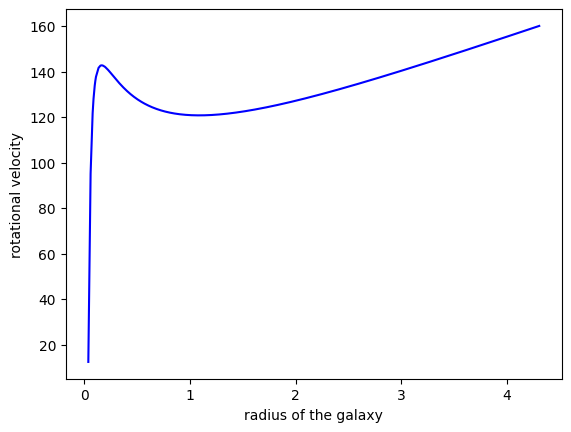

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#expansion of space
space0 = 3 #initial size of space
A = 1.1 #velocity of space expanding

# particles
n = 1000
x = np.random.normal(0, 1.2, n)
y = np.random.normal(0, 0.8, n)
r = np.sqrt(x**2+y**2)
r.sort()
rng = np.random.default_rng(6452341)
theta = rng.integers(low=0, high=360, size=n)

X = range(0,n)
V = np.zeros(n)
    #for each particle
for t in range(0,30):
    for item in range(len(V)):
        #theta[item] = theta[item]
        V[item] = 100*(t/24)*(2.1/np.sqrt(r[item])-0.4/r[item] + 0.8*r[item]**0.75)/2.5# + 1/np.sqrt(max(r)-r[item])+0.01 )
        


#print(r)
#print(V)

fig = plt.figure()
ax = plt.subplot(111)
ax.set_facecolor('white')
fig.set_facecolor('white')
plt.plot(r,V, color='blue')
#ax = plt.axes()
#ax.set_facecolor('white') 
plt.xlabel("radius of the galaxy")
plt.ylabel("rotational velocity")
plt.savefig('galaxy_curve.png')

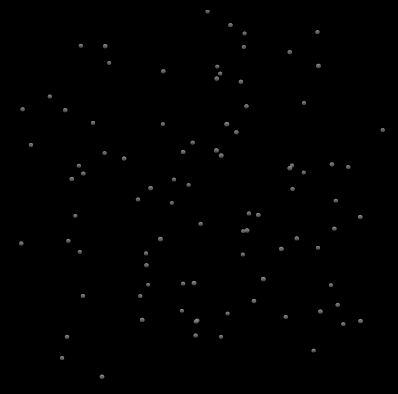

In [30]:
#draw spheres
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for t in range(len(objects)):
    r = objects[t][2]
    c = [objects[t][3], objects[t][4], objects[t][5]]
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x = r*np.cos(u)*np.sin(v)
    y = r*np.sin(u)*np.sin(v)
    z = r*np.cos(v)
    ax.plot_surface(x-c[0], y-c[1], z-c[2], color = "white")

expansion = 500 #+ num
#x,y,z limits
ax.set_xlim(-expansion, expansion) 
ax.set_ylim(-expansion, expansion)
ax.set_zlim(-expansion, expansion)
ax.set_box_aspect([1,1,1])   
ax.view_init(20, 45)
fig.set_facecolor('black')
ax.set_facecolor('black') 
ax.grid(False) 
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)